#### Libraries

In [1]:
import json
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

### Plot training & validation curves, training & validation times.

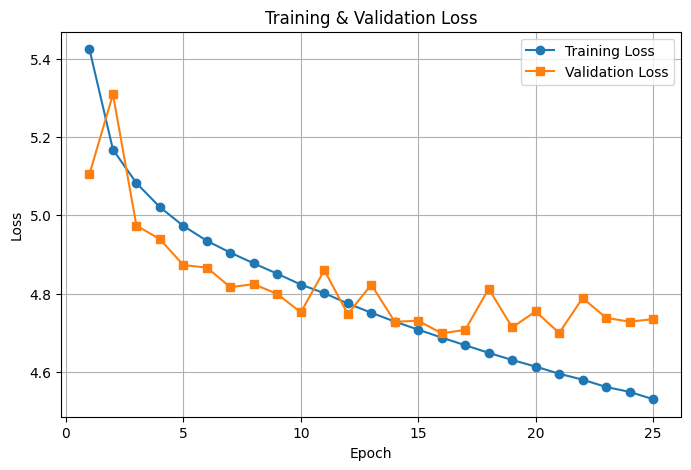

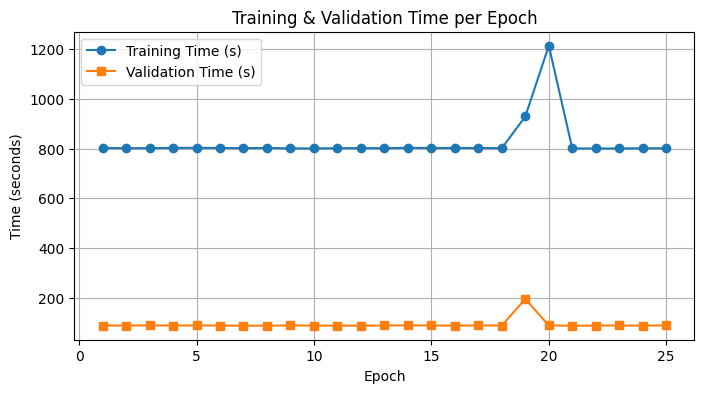

In [2]:
metrics_path = 'training_metrics.json'

with open(metrics_path, 'r') as f:
    metrics = json.load(f)['epochs']

epochs = list(range(1, len(metrics) + 1))
train_loss = [float(m['train_loss']) for m in metrics]
val_loss = [float(m['val_loss']) for m in metrics]
train_time = [float(m['train_time']) for m in metrics]
val_time = [float(m['val_time']) for m in metrics]


plt.figure(figsize=(8,5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8,4))
plt.plot(epochs, train_time, label='Training Time (s)', marker='o')
plt.plot(epochs, val_time, label='Validation Time (s)', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Training & Validation Time per Epoch')
plt.legend()
plt.grid(True)
plt.show()


### Model generated samples

In [3]:
DISPLAY_N_IMAGES = 100

In [ ]:
metrics_path = "eval_metrics.json"
rgb_test_dir = "./data_subset/test"
pred_dir = "./predictions"

with open(metrics_path, "r") as f:
    metrics = json.load(f)

print("=== Evaluation Metrics ===")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

all_files = [f for f in os.listdir(rgb_test_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f"Total test images found: {len(all_files)}")

sample_files = random.sample(all_files, DISPLAY_N_IMAGES)

def load_image(path):
    return Image.open(path).convert("RGB")

def show_triplet(rgb_path, pred_path):
    rgb_img = Image.open(rgb_path).convert("RGB")
    gray_img = rgb_img.convert("L")
    pred_img = load_image(pred_path)

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(gray_img, cmap="gray")
    axes[0].set_title("Grayscale Input")
    axes[0].axis("off")

    axes[1].imshow(pred_img)
    axes[1].set_title("Model Prediction")
    axes[1].axis("off")

    axes[2].imshow(rgb_img)
    axes[2].set_title("Ground Truth")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

for filename in sample_files:
    rgb_path = os.path.join(rgb_test_dir, filename)
    pred_path = os.path.join(pred_dir, filename)

    if os.path.exists(pred_path):
        show_triplet(rgb_path, pred_path)
    else:
        print(f"Prediction not found for {filename}")